## Mengimport Library

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read Dataset

In [32]:
df = pd.read_json("/content/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


# Melakukan Pengecekan Data yang Null / Tidak Valid

In [33]:
df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

## Menvisualisasikan Pesebaran Data

<Axes: xlabel='is_sarcastic', ylabel='count'>

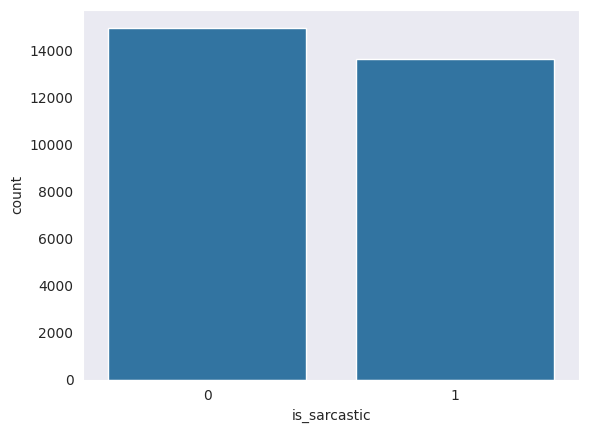

In [34]:
sns.set_style("dark")
sns.countplot(df, x="is_sarcastic")

## Menghilangkan Stopwords (misalnya, "is", "are" "a", "the", "of"), Tanda Baca, Symbol, ataupun Spasi

In [35]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence)
		preprocessed_text.append(' '.join(token.lower()
								for token in str(sentence).split()
								if token not in stopwords.words('english')))

	return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['headline']=df['headline'].apply(denoise_text)

<ipython-input-36-6ddd7b45e4fe>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [37]:
# preprocessed_review = preprocess_text(df['headline'].values)
# df["headline"] = preprocessed_review

In [38]:
# testku =  preprocess_text(["    a butter of  lov   ee is so gre aat "])
# testku

In [39]:
df['headline']

0        thirtysomething scientists unveil doomsday clo...
1        dem rep. totally nails congress falling short ...
2             eat veggies: 9 deliciously different recipes
3             inclement weather prevents liar getting work
4        mother comes pretty close using word 'streamin...
                               ...                        
28614               jews celebrate rosh hashasha something
28615    internal affairs investigator disappointed con...
28616    beautiful acceptance speech week came queer ko...
28617    mars probe destroyed orbiting spielberg-gates ...
28618                              dad clarifies food stop
Name: headline, Length: 28619, dtype: object

## Membuat Gambar Wordclod untuk Headline Berita yang non-sarcastic

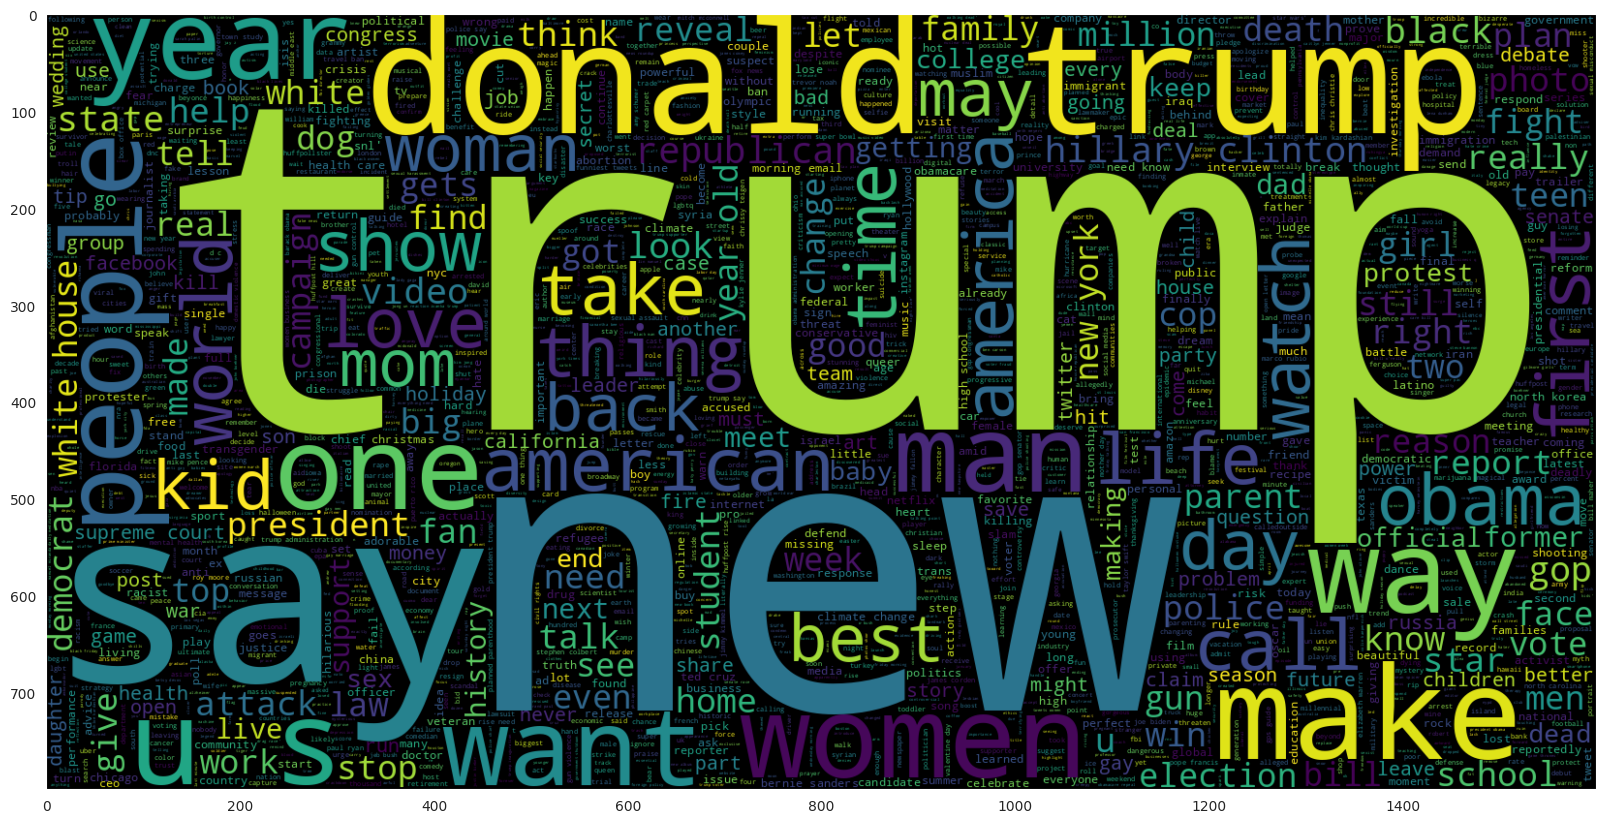

In [40]:
# Mengambil data yang headline beritanya tidak sarkas
non_sarcastic_df = df[df.is_sarcastic == 0]

# Menggabungkan semua headline non-sarcas jadi satu kalimat panjang
all_non_sarcas_str = " ".join(non_sarcastic_df.headline)
all_non_sarcas_str

# Menampilkan wordcloud dari semua headline non-sarcasm
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(all_non_sarcas_str)
plt.imshow(wc , interpolation = 'bilinear')

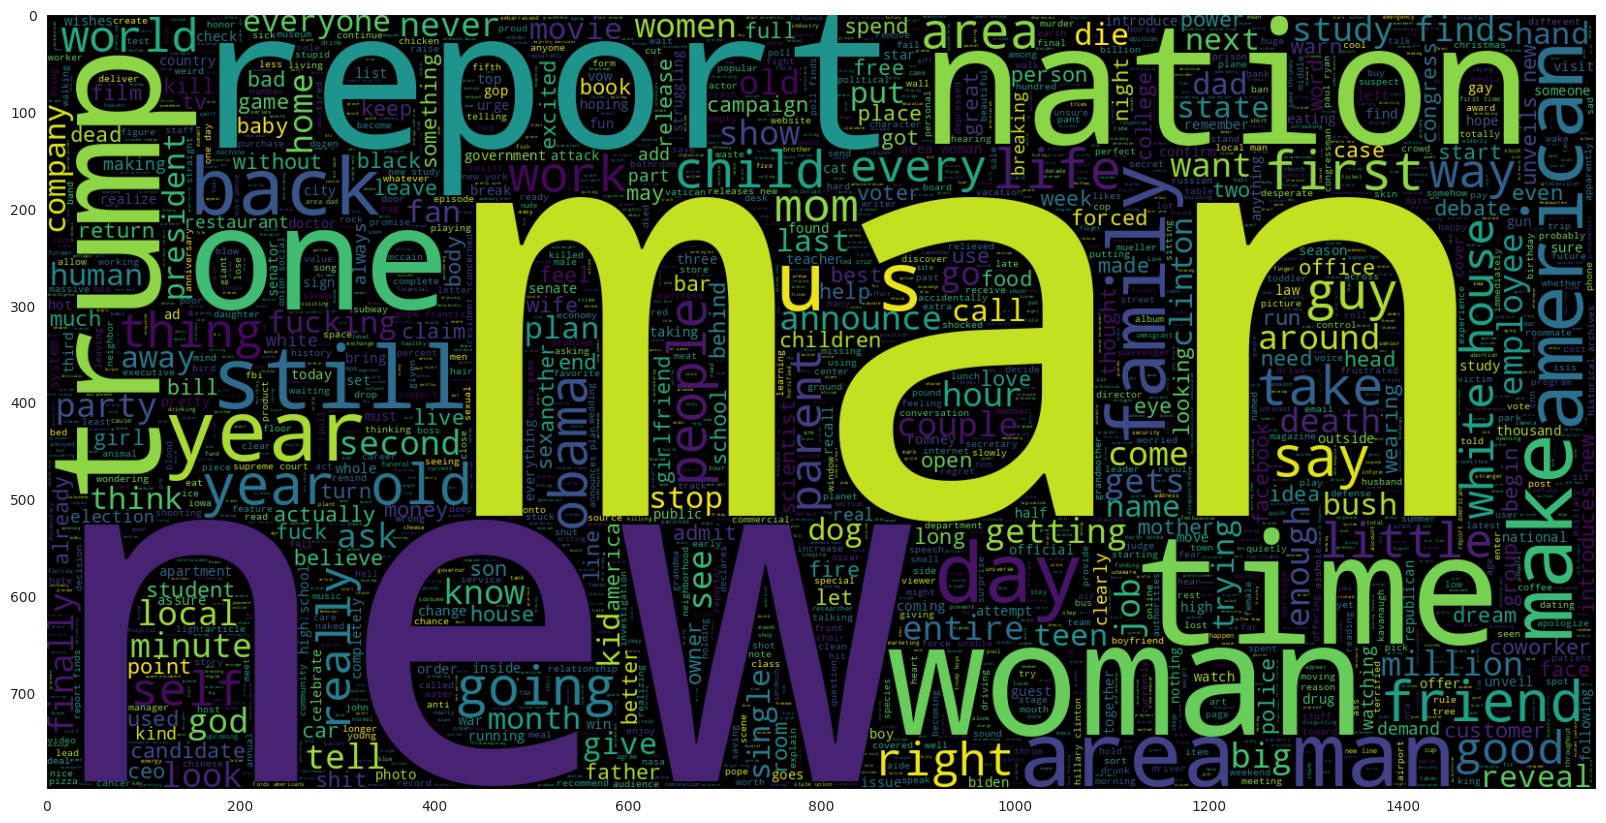

In [30]:
# Mengambil data yang headline beritanya sarkas
sarcastic_df = df[df.is_sarcastic == 1]

# Menggabungkan semua headline non-sarcas jadi satu kalimat panjang
all_sarcas_str = " ".join(sarcastic_df.headline)
all_sarcas_str

# Menampilkan wordcloud dari semua headline non-sarcasm
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(all_sarcas_str)
plt.imshow(wc , interpolation = 'bilinear')

## Menampilkan kata yang paling sering muncul

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Fungsi ini menerima input corpus (kumpulan text) dan kemudian akan
# mengurutkannya sesuai dengan frekuensi yang paling sering muncul
def get_top_n_words(corpus, n=None):
  # Mengubah corpus menjadi representasi angka
  vec = CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)

  # Menghitung jumlah occurance / kejadian suatu kata muncul
  sum_words = bag_of_words.sum(axis=0)

  # Mendapatkan kata serta jumlah munculnya suatu kata
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

  # Mengurutkan dari tinggi ke rendah
  words_freq = sorted(words_freq, key=lambda x: x[1],
						reverse=True)

  # Mengembalikan n kata teratas yang paling banyak muncul
  return words_freq[:n]

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

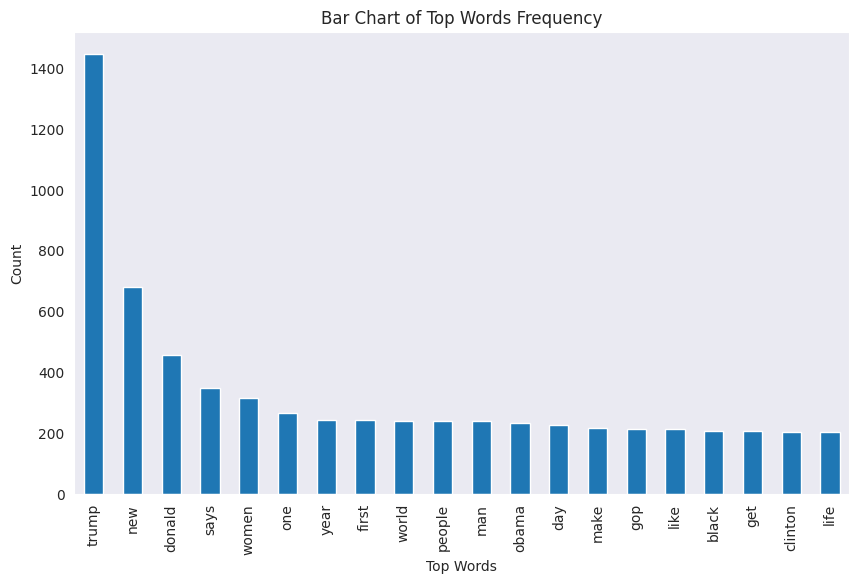

In [42]:
# Menampilkan top words dari headline non sarcastic
common_words = get_top_n_words(non_sarcastic_df.headline , 20)
df1 = pd.DataFrame(common_words, columns=['Word', 'count'])

df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

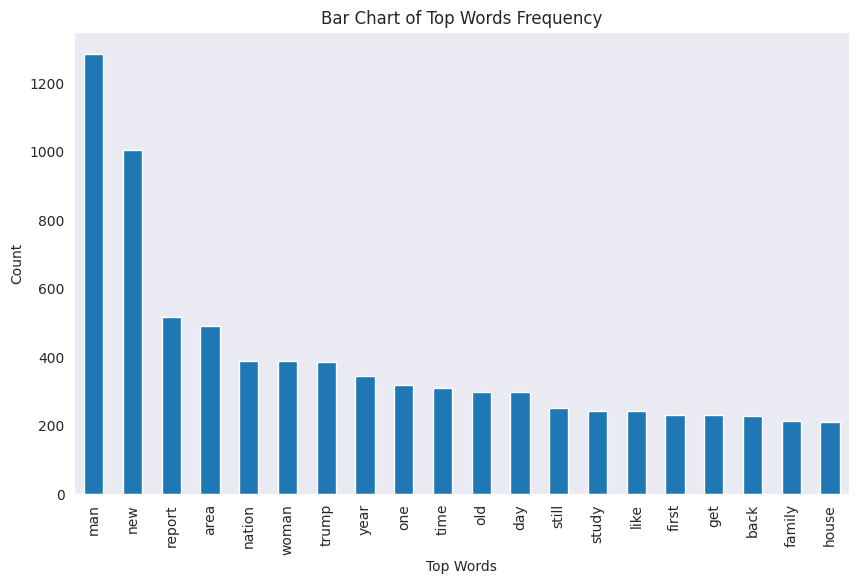

In [43]:
# Menampilkan top words dari headline sarcastic
common_words = get_top_n_words(sarcastic_df.headline , 20)
df1 = pd.DataFrame(common_words, columns=['Word', 'count'])

df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)

## Membagi dataset menjadi train dan test

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df['headline'],
													df['is_sarcastic'],
													test_size=0.2, random_state=42)

## Membangun Model

In [86]:
log_reg = LogisticRegression()

forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

gini_tree = DecisionTreeClassifier(criterion = "gini",
            random_state = 42,max_depth=1000, min_samples_leaf=6)

entropy_tree = model_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 42,
            max_depth = 1000, min_samples_leaf = 6)

KNN = KNeighborsClassifier() #'minkowski', 'manhattan'.
param_grid = {"n_neighbors":[2,4,5,10,20],'metric':['euclidean', 'minkowski']}
grid = GridSearchCV(KNN,param_grid)

SVM_linear = SVC(kernel = 'linear', random_state = 42)

SVM_RBF = SVC(kernel = 'rbf', random_state = 42)

algo_names = [
    "Linear Regression",
    "Random Forest",
    "Gini Decision Tree",
    "Entropy Decision Tree",
    "KNN",
    "Linear SVM",
    "RBF SVM"
]

algorithms = [log_reg, forest, gini_tree, entropy_tree, KNN, SVM_linear, SVM_RBF]

Linear Regression  : 

Accuracy :  0.8001397624039134

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2995
           1       0.81      0.76      0.78      2729

    accuracy                           0.80      5724
   macro avg       0.80      0.80      0.80      5724
weighted avg       0.80      0.80      0.80      5724

5-Fold Cross Validation Accuracy: 78.60 %
5-Fold Cross Validation Standard Deviation: 0.31 %
Stratified K Fold Validation Accuracy: 77.19 %
Stratified K Fold Validation Standard Deviation: 0.05 %


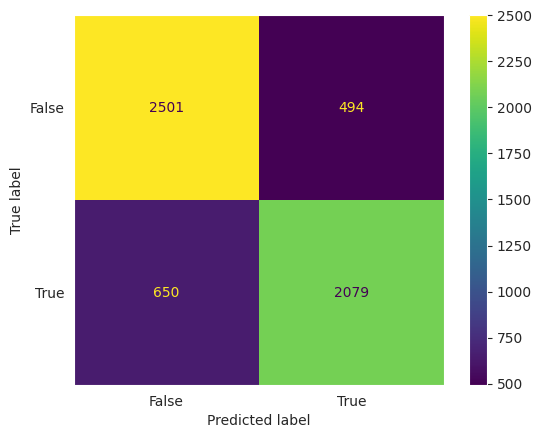


--------------------------------------------------

Random Forest  : 

Accuracy :  0.7472047519217331

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      2995
           1       0.80      0.63      0.70      2729

    accuracy                           0.75      5724
   macro avg       0.76      0.74      0.74      5724
weighted avg       0.76      0.75      0.74      5724

5-Fold Cross Validation Accuracy: 73.78 %
5-Fold Cross Validation Standard Deviation: 0.42 %
Stratified K Fold Validation Accuracy: 72.41 %
Stratified K Fold Validation Standard Deviation: 0.06 %


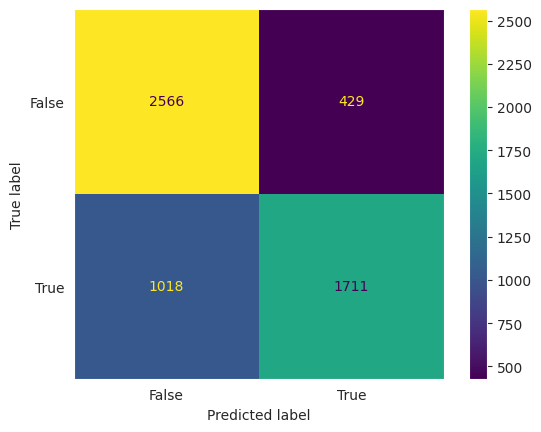


--------------------------------------------------

Gini Decision Tree  : 

Accuracy :  0.7021313766596785

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      2995
           1       0.72      0.62      0.67      2729

    accuracy                           0.70      5724
   macro avg       0.70      0.70      0.70      5724
weighted avg       0.70      0.70      0.70      5724

5-Fold Cross Validation Accuracy: 69.38 %
5-Fold Cross Validation Standard Deviation: 0.18 %
Stratified K Fold Validation Accuracy: 68.54 %
Stratified K Fold Validation Standard Deviation: 0.42 %


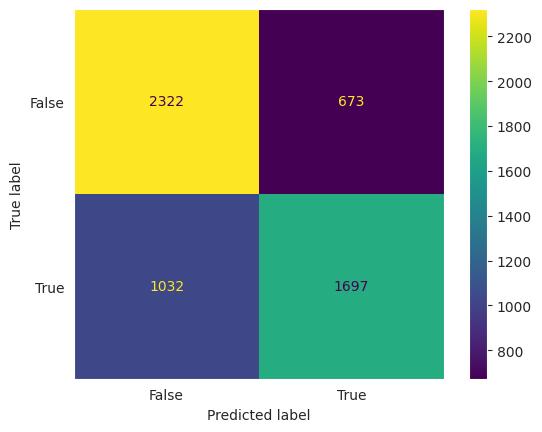


--------------------------------------------------

Entropy Decision Tree  : 

Accuracy :  0.7056254367575122

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      2995
           1       0.72      0.63      0.67      2729

    accuracy                           0.71      5724
   macro avg       0.71      0.70      0.70      5724
weighted avg       0.71      0.71      0.70      5724

5-Fold Cross Validation Accuracy: 70.12 %
5-Fold Cross Validation Standard Deviation: 0.67 %
Stratified K Fold Validation Accuracy: 69.12 %
Stratified K Fold Validation Standard Deviation: 0.07 %


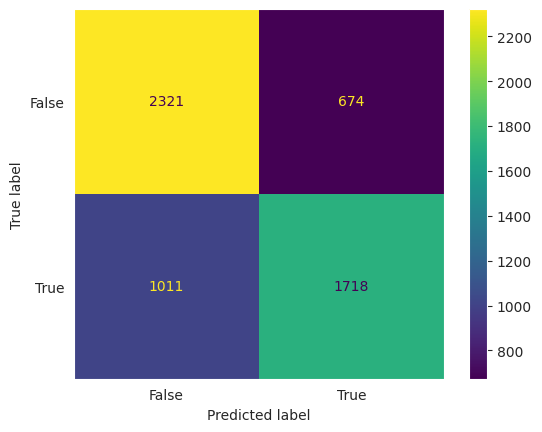


--------------------------------------------------

KNN  : 

Accuracy :  0.5994060097833682

              precision    recall  f1-score   support

           0       0.57      0.97      0.72      2995
           1       0.86      0.19      0.31      2729

    accuracy                           0.60      5724
   macro avg       0.71      0.58      0.52      5724
weighted avg       0.71      0.60      0.52      5724

5-Fold Cross Validation Accuracy: 62.13 %
5-Fold Cross Validation Standard Deviation: 3.59 %
Stratified K Fold Validation Accuracy: 65.58 %
Stratified K Fold Validation Standard Deviation: 0.41 %


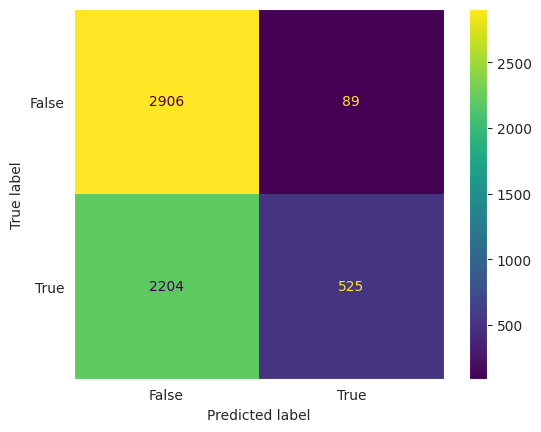


--------------------------------------------------

Linear SVM  : 

Accuracy :  0.800314465408805

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2995
           1       0.80      0.78      0.79      2729

    accuracy                           0.80      5724
   macro avg       0.80      0.80      0.80      5724
weighted avg       0.80      0.80      0.80      5724

5-Fold Cross Validation Accuracy: 78.65 %
5-Fold Cross Validation Standard Deviation: 0.25 %
Stratified K Fold Validation Accuracy: 77.24 %
Stratified K Fold Validation Standard Deviation: 0.05 %


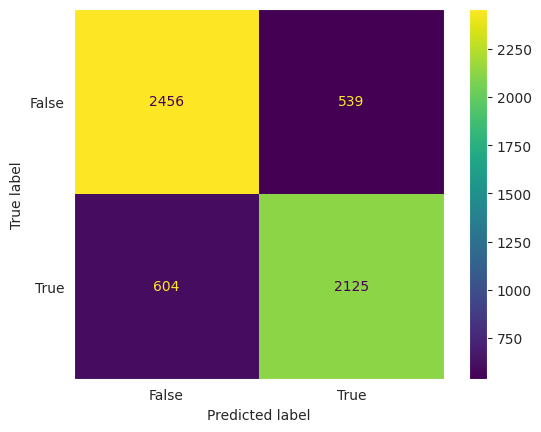


--------------------------------------------------

RBF SVM  : 

Accuracy :  0.806953179594689

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2995
           1       0.81      0.77      0.79      2729

    accuracy                           0.81      5724
   macro avg       0.81      0.81      0.81      5724
weighted avg       0.81      0.81      0.81      5724

5-Fold Cross Validation Accuracy: 79.35 %
5-Fold Cross Validation Standard Deviation: 0.23 %
Stratified K Fold Validation Accuracy: 77.58 %
Stratified K Fold Validation Standard Deviation: 0.00 %


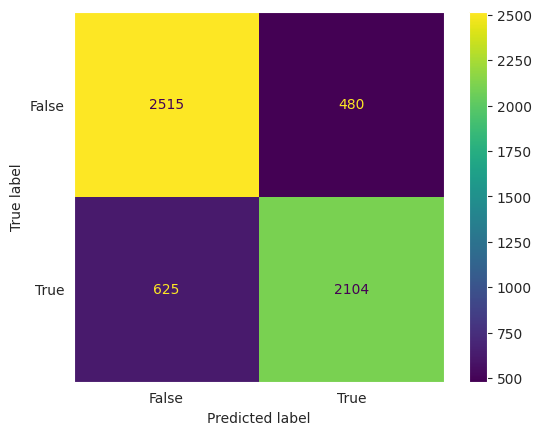


--------------------------------------------------



In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
results = []
for i in range(len(algorithms)):
  pipe = Pipeline([('vectorizer', TfidfVectorizer(stop_words='english', max_df=0.7)), (algo_names[i], algorithms[i])])
  pipe.fit(x_train, y_train)

  acc = accuracy_score(y_test, pipe.predict(x_test))
  pre_score = precision_score(y_test, pipe.predict(x_test))
  rec_score = recall_score(y_test, pipe.predict(x_test))
  f_score = f1_score(y_test, pipe.predict(x_test))

  print(algo_names[i], " : ")
  print()
  print("Accuracy : ", acc)
  print()
  print(classification_report(y_test, pipe.predict(x_test)))


  # Mencoba menggunakan 5-Fold Cross Validation
  accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = 5)
  print("5-Fold Cross Validation Accuracy: {:.2f} %".format(accuracies.mean()*100))
  print("5-Fold Cross Validation Standard Deviation: {:.2f} %".format(accuracies.std()*100))

  # Mencoba menggunakan Stratified Cross Validation
  skf = StratifiedKFold(n_splits=2)
  stratified_accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = skf)
  print("Stratified K Fold Validation Accuracy: {:.2f} %".format(stratified_accuracies.mean()*100))
  print("Stratified K Fold Validation Standard Deviation: {:.2f} %".format(stratified_accuracies.std()*100))

  results.append(list([acc, pre_score, rec_score, f_score, accuracies.mean(), stratified_accuracies.mean()]))

  cm = metrics.confusion_matrix(y_test, pipe.predict(x_test))

  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])


  cm_display.plot()
  plt.show()

  print()
  print("-" * 50)
  print()

## Membandingkan 7 algoritma

In [89]:
df1 = pd.DataFrame(data=results, index=algo_names, columns=["accuracy", "precision", "recall", "f1-score", "5-Fold Cross Accuracy", "Stratified K Fold Cross Accuracy"])
df1

,accuracy,precision,recall,f1-score,5-Fold Cross Accuracy,Stratified K Fold Cross Accuracy
Linear Regression,0.800140,0.808006,0.761818,0.784232,0.785979,0.771872
Random Forest,0.747205,0.799533,0.626970,0.702814,0.737847,0.724088
Gini Decision Tree,0.702131,0.716034,0.621840,0.665621,0.693776,0.685390
Entropy Decision Tree,0.705625,0.718227,0.629535,0.670963,0.701245,0.691155
KNN,0.599406,0.855049,0.192378,0.314089,0.621271,0.655820
Linear SVM,0.800314,0.797673,0.778674,0.788059,0.786504,0.772439
RBF SVM,0.806953,0.814241,0.770978,0.792020,0.793492,0.775846


## Mencoba Menggunakan RNN

### Mempersiapkan Data

In [96]:
# Untuk melakukan RNN kita akan menggunakan pendekatan yang berbeda,
# disini, kita akan memisahkan kalimat per-kata nya
words = []
for i in df.headline.values:
    words.append(i.split())

In [97]:
# Kemudian kita instead menggunakan TF-ID seperti sebelumnya,
# kita akan coba menggunakan algoritma Word2Vec untuk
# mengubah kata menjadi representasi vector

import gensim
# Menetapkan dimensi vectornya
EMBEDDING_DIM = 200
w2v_model = gensim.models.Word2Vec(sentences = words , vector_size=EMBEDDING_DIM , window = 5 , min_count = 1)

In [98]:
# Mengubah text menjadi sebuah barisan token
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen = 20)

In [99]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # Membuat sebuah vector berisi 0 yang akan dugunakan sebagai
    # matrix bobot
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

    # Mengisi matrix tersebut dengan vector yang telah didapatkan
    # dari traning Word2Vec untuk setiap kata yang ada di vocabulary kita.
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [100]:
# Mengekstrak embedding vector dari model Word2Vec yang telah dilatih
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

### Membangun Model

In [65]:
# Membangun model RNN

vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

### Evaluasi Model

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 200)           7614400   
                                                                 
 bidirectional (Bidirection  (None, 20, 256)           336896    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                55680     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 8007041 (30.54 MB)
Trainable params: 8007041 (30.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, df.is_sarcastic , test_size = 0.3 , random_state = 0)

In [68]:
history = model.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 3)

Epoch 1/3
157/157 [==============================] - 108s 603ms/step - loss: 0.5100 - acc: 0.7385 - val_loss: 0.4095 - val_acc: 0.8166
Epoch 2/3
157/157 [==============================] - 120s 766ms/step - loss: 0.1443 - acc: 0.9457 - val_loss: 0.5041 - val_acc: 0.7920
Epoch 3/3
157/157 [==============================] - 146s 936ms/step - loss: 0.0359 - acc: 0.9881 - val_loss: 0.8655 - val_acc: 0.7899


In [69]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

627/627 [==============================] - 38s 61ms/step - loss: 0.0177 - acc: 0.9946
Accuracy of the model on Training Data is -  99.45589900016785
269/269 [==============================] - 15s 55ms/step - loss: 0.8655 - acc: 0.7899
Accuracy of the model on Testing Data is -  78.98905277252197


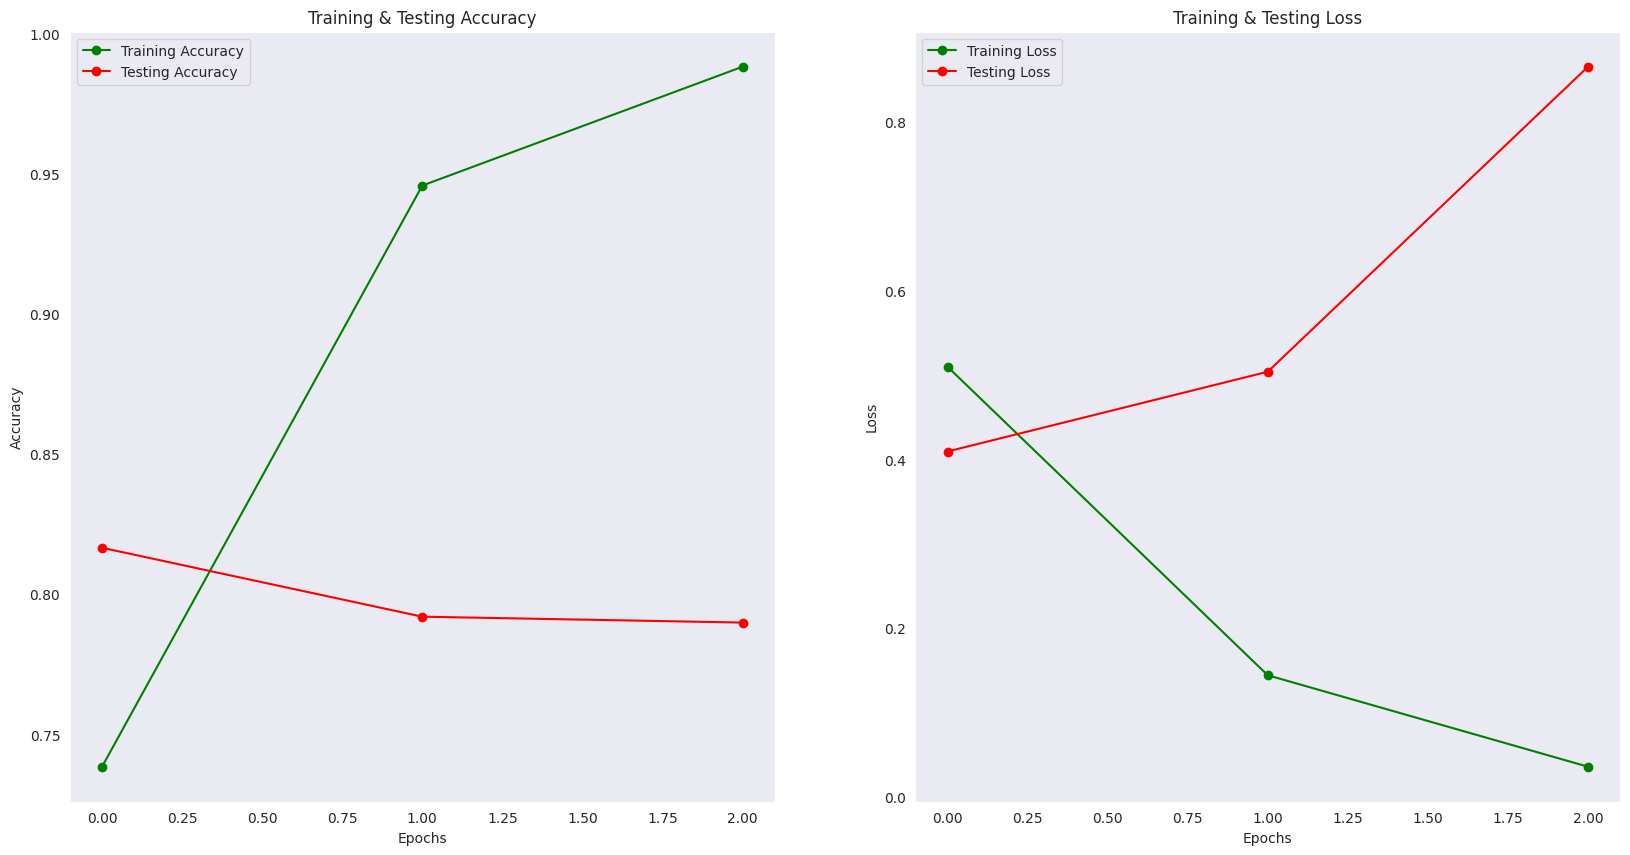

In [70]:
epochs = [i for i in range(3)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [71]:
# pred = model.predict_classes(x_test)
# pred[:5]
pred_probabilities = model.predict(x_test)
pred_classes = np.where(pred_probabilities > 0.5, 1,0)
pred_classes[:5]
# classes_x
# predict_x

269/269 [==============================] - 16s 54ms/step


array([[1],
       [0],
       [1],
       [0],
       [1]])

In [106]:
cm = confusion_matrix(y_test, pred_classes)
cm

array([[3977,  583],
       [1221, 2805]])

In [126]:
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      4560
           1       0.83      0.70      0.76      4026

    accuracy                           0.79      8586
   macro avg       0.80      0.78      0.79      8586
weighted avg       0.79      0.79      0.79      8586



In [110]:
acc = accuracy_score(y_test, pred_classes)
pre_score = precision_score(y_test, pred_classes)
rec_score = recall_score(y_test, pred_classes)
f_score = f1_score(y_test, pred_classes)

In [116]:
results.append(list([acc, pre_score, rec_score, f_score, np.nan, np.nan]))

In [124]:
print(results)

[[0.8001397624039134, 0.8080062184220754, 0.7618175155734701, 0.7842323651452282, 0.7859794715003277, 0.7718715662625741], [0.7472047519217331, 0.7995327102803739, 0.6269695859289117, 0.7028137194495789, 0.7378466914173399, 0.7240882531451578], [0.7021313766596785, 0.7160337552742616, 0.6218395016489556, 0.665620709943126, 0.6937759336099585, 0.6853896412701883], [0.7056254367575122, 0.7182274247491639, 0.6295346280688897, 0.6709627025971491, 0.7012448132780084, 0.6911553059196587], [0.5994060097833682, 0.8550488599348535, 0.19237816049835105, 0.3140891414896799, 0.6212710198733348, 0.6558198680614581], [0.800314465408805, 0.7976726726726727, 0.7786735067790399, 0.7880585944743186, 0.7865036034068574, 0.7724393739213269], [0.806953179594689, 0.8142414860681114, 0.7709783803591059, 0.7920195746282702, 0.7934920288272548, 0.7758462542131247], [0.7898905194502679, 0.827922077922078, 0.6967213114754098, 0.7566765578635014, nan, nan]]


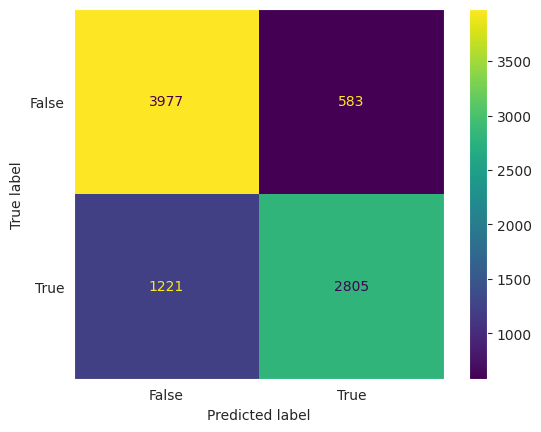

In [111]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
              display_labels=[False, True])
cm_display.plot()
plt.show()

In [125]:
df2 = pd.DataFrame(data=results, index=algo_names+['RNN'], columns=["accuracy", "precision", "recall", "f1-score", "5-Fold Cross Accuracy", "Stratified K Fold Cross Accuracy"])
df2

,accuracy,precision,recall,f1-score,5-Fold Cross Accuracy,Stratified K Fold Cross Accuracy
Linear Regression,0.800140,0.808006,0.761818,0.784232,0.785979,0.771872
Random Forest,0.747205,0.799533,0.626970,0.702814,0.737847,0.724088
Gini Decision Tree,0.702131,0.716034,0.621840,0.665621,0.693776,0.685390
Entropy Decision Tree,0.705625,0.718227,0.629535,0.670963,0.701245,0.691155
KNN,0.599406,0.855049,0.192378,0.314089,0.621271,0.655820
Linear SVM,0.800314,0.797673,0.778674,0.788059,0.786504,0.772439
RBF SVM,0.806953,0.814241,0.770978,0.792020,0.793492,0.775846
RNN,0.789891,0.827922,0.696721,0.756677,NaN,NaN
